# Convert Coco JSON Annotations to YOLO TXT Files
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

In [1]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
# !pip install pylabel > /dev/null

In [2]:
from pylabel import importer

## Import coco annotations 
First we will import annotations from the coco dataset, which are in coco json format. 

In [3]:
import os 
import zipfile

# #Download sample  dataset 
# os.makedirs("data", exist_ok=True)
# !wget "https://github.com/pylabelalpha/notebook/blob/main/BCCD_coco.zip?raw=true" -O data/BCCD_coco.zip
# with zipfile.ZipFile("data/BCCD_coco.zip", 'r') as zip_ref:
#    zip_ref.extractall("data")

#Specify path to the coco.json file
path_to_annotations = "/media/ian/WD/datasets/rpc_tmp/synthesize_1500_best_small_seg.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "/media/ian/WD/datasets/rpc_tmp/synthesize_1500_best_small"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="rpc_coco")
dataset.df.head(5)


,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/media/ian/WD/datasets/rpc_tmp/synthesize_1500...,synthesized_image_0.jpg,,0,750,750,,,279.5,221.5,...,"[[353.0, 283.5, 347.0, 282.5, 337.0, 277.5, 33...",0,,,,195,195_stationery,stationery,,1
1,/media/ian/WD/datasets/rpc_tmp/synthesize_1500...,synthesized_image_0.jpg,,0,750,750,,,242.5,58.5,...,"[[356.0, 174.5, 345.0, 174.5, 328.0, 165.5, 28...",0,,,,159,159_seasoner,seasoner,,1
2,/media/ian/WD/datasets/rpc_tmp/synthesize_1500...,synthesized_image_0.jpg,,0,750,750,,,108.5,572.5,...,"[[177.0, 743.5, 172.0, 742.5, 165.5, 731.0, 15...",0,,,,159,159_seasoner,seasoner,,1
3,/media/ian/WD/datasets/rpc_tmp/synthesize_1500...,synthesized_image_0.jpg,,0,750,750,,,425.5,313.5,...,"[[448.0, 482.5, 444.0, 482.5, 438.0, 478.5, 42...",0,,,,72,72_drink,drink,,1
4,/media/ian/WD/datasets/rpc_tmp/synthesize_1500...,synthesized_image_0.jpg,,0,750,750,,,265.5,504.5,...,"[[360.0, 587.5, 348.0, 587.5, 338.0, 582.5, 28...",0,,,,65,65_dessert,dessert,,1


## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [4]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")


Number of images: 1500
Number of classes: 200
Classes:['1_puffed_food', '2_puffed_food', '3_puffed_food', '4_puffed_food', '5_puffed_food', '6_puffed_food', '7_puffed_food', '8_puffed_food', '9_puffed_food', '10_puffed_food', '11_puffed_food', '12_puffed_food', '13_dried_fruit', '14_dried_fruit', '15_dried_fruit', '16_dried_fruit', '17_dried_fruit', '18_dried_fruit', '19_dried_fruit', '20_dried_fruit', '21_dried_fruit', '22_dried_food', '23_dried_food', '24_dried_food', '25_dried_food', '26_dried_food', '27_dried_food', '28_dried_food', '29_dried_food', '30_dried_food', '31_instant_drink', '32_instant_drink', '33_instant_drink', '34_instant_drink', '35_instant_drink', '36_instant_drink', '37_instant_drink', '38_instant_drink', '39_instant_drink', '40_instant_drink', '41_instant_drink', '42_instant_noodles', '43_instant_noodles', '44_instant_noodles', '45_instant_noodles', '46_instant_noodles', '47_instant_noodles', '48_instant_noodles', '49_instant_noodles', '50_instant_noodles', '51_i

## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

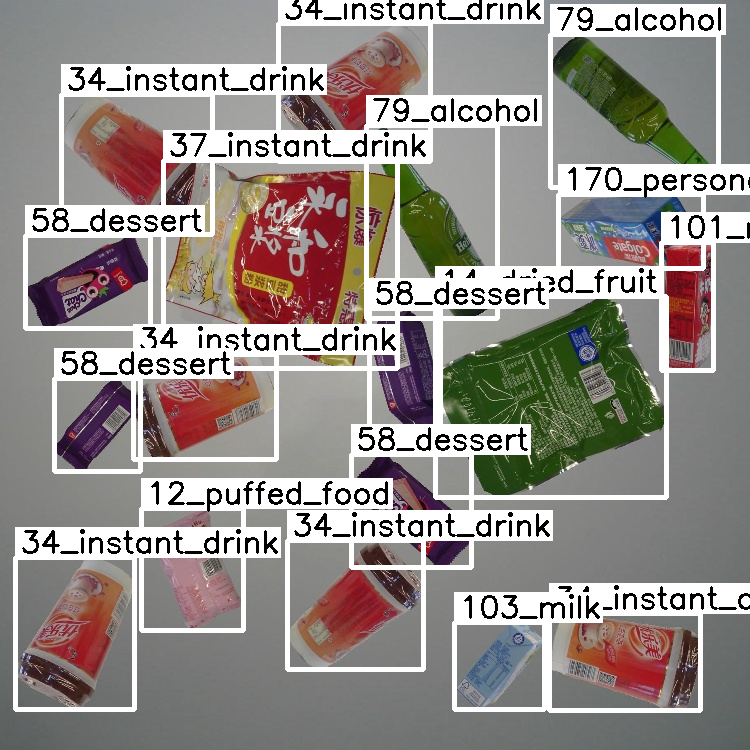

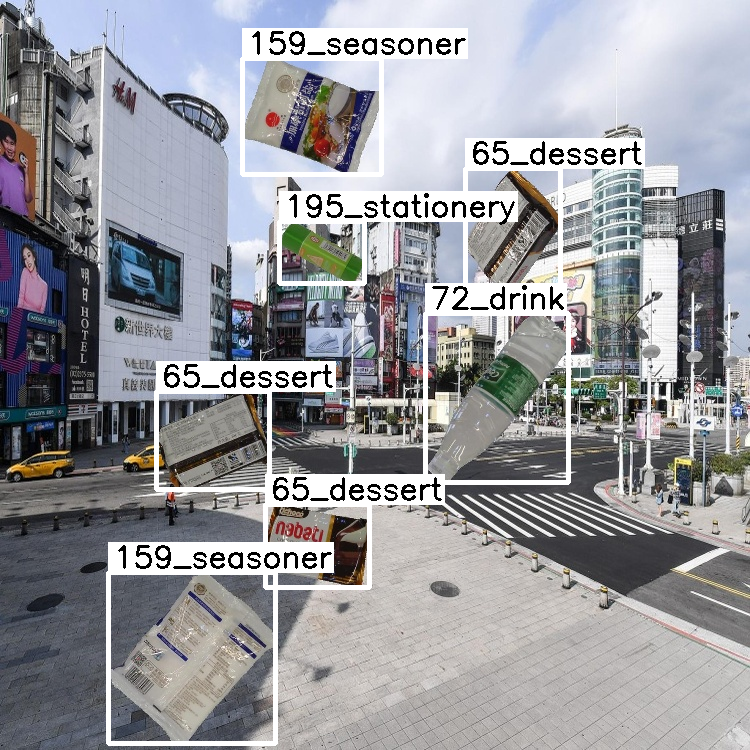

In [5]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
display(dataset.visualize.ShowBoundingBoxes("synthesized_image_0.jpg"))

# Export to Yolo v5
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
Yolo creates one text file for each image in the dataset. 

In [6]:
dataset.path_to_annotations = "/media/ian/WD/datasets/rpc_tmp/synthesize_1500_best_small_yolo"
dataset.export.ExportToYoloV5()[0]

'training/dataset.yaml'